In [110]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
from scipy.ndimage import convolve1d
import peakutils
from peakutils.plot import plot as pplot
import seaborn as sns
import pandas as pd
import pickle
%matplotlib inline

In [111]:
# import some data
filename = 'res/2-14 Traces/2-15_Standard Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle'
with open(filename, 'rb') as handle:
    df = pickle.load(handle)

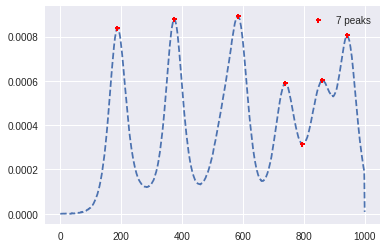

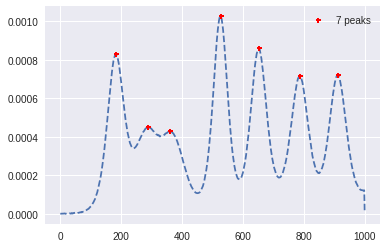

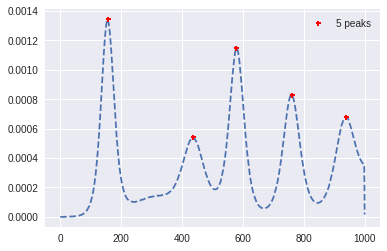

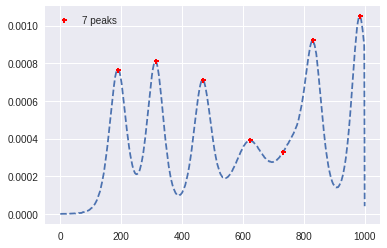

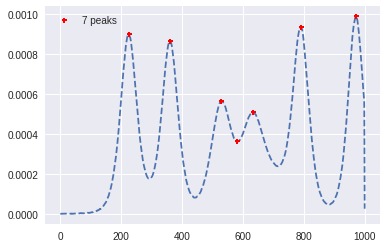

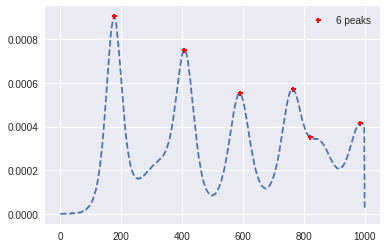

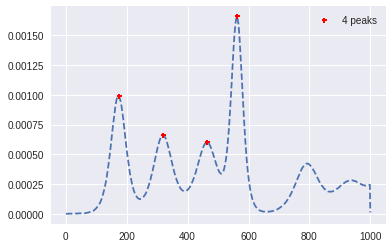

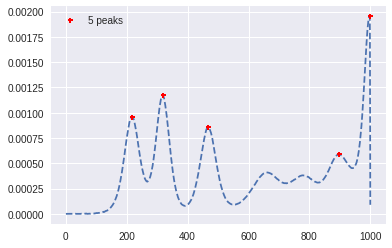

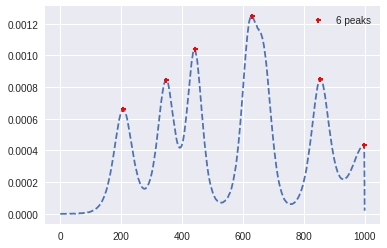

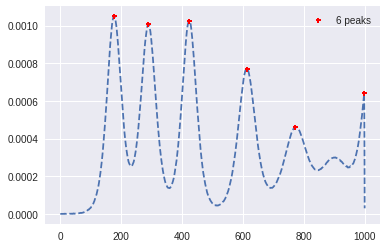

In [122]:
#######################
# Calculate Lag Times #
#######################

# loop over sims
sims = set(df['sim'].values)
t_lag = np.zeros(len(sims))
for i, sim in enumerate(sims):
    # extract data for this sim
    data = df[df['sim'] == sim]
    t = data['time'].values
    f = data['value'].values
    # smooth with gaussian filter
    gaussian_filter = gaussian(30, 10)
    filtered_signal = convolve1d(f, gaussian_filter/gaussian_filter.sum())
    # calculate first derivative  
    dt = np.diff(t)
    t_avg = (t[1:]+t[:-1])/2
    filt_grad = np.diff(filtered_signal)/dt
    # find peaks
    peak_ind = peakutils.indexes(filt_grad, thres=0.3, min_dist=int(50/dt.mean()))
    # get timestamp for this point
    t_lag[i] = t_avg[peak_ind[0]]
    pplot(t_avg, filt_grad, peak_ind)
    plt.show()

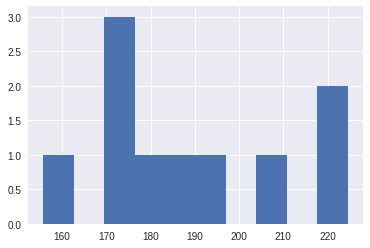

In [123]:
# plot results
plt.hist(t_lag)
plt.show()